In [81]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
df1 = pd.read_csv('car data.csv')

In [4]:
df1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df1.shape

(301, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Step 1 
### Univariate Analysis

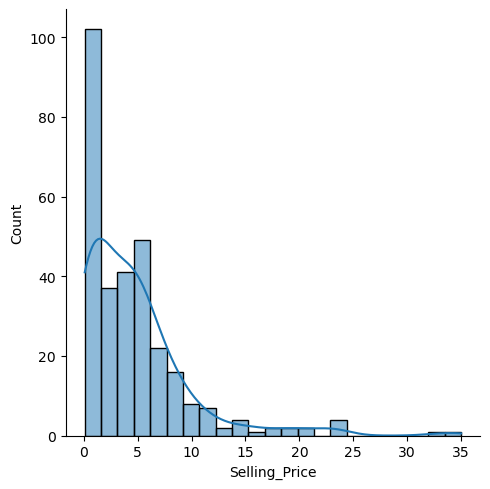

In [11]:
sns.displot(x = df1.Selling_Price, kde = True)
plt.show()

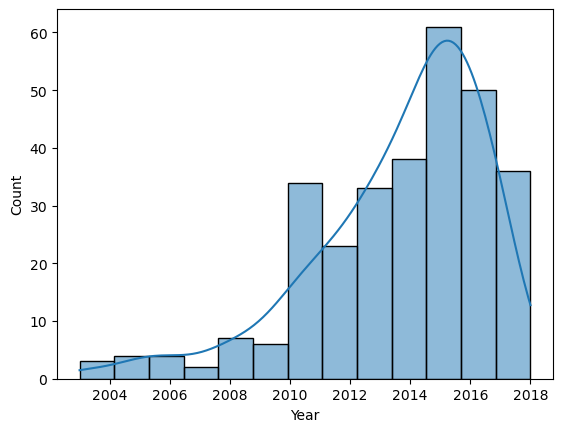

In [13]:
sns.histplot(x = df1.Year, kde = True)
plt.show()

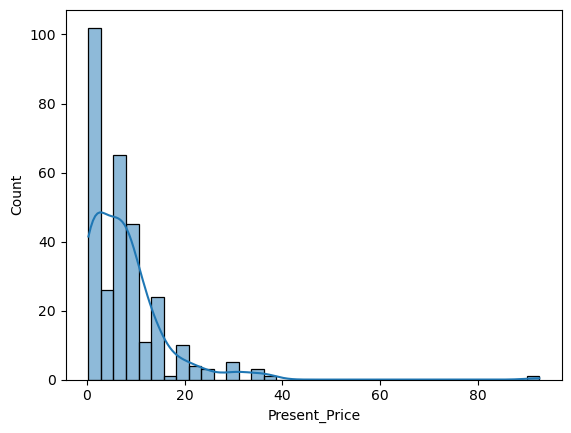

In [15]:
sns.histplot(x = df1.Present_Price, kde = True)
plt.show()

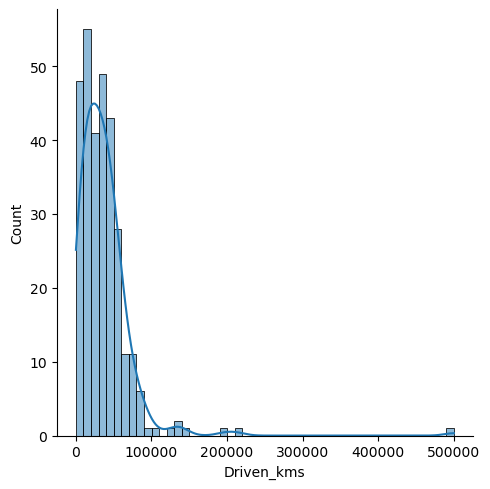

In [16]:
sns.displot(x = df1.Driven_kms, kde = True)
plt.show()

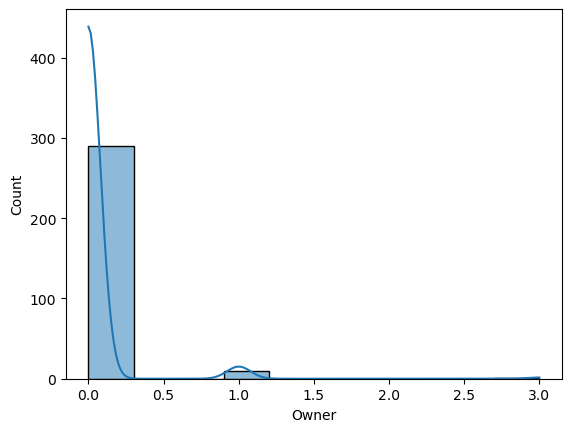

In [17]:
sns.histplot(x = df1.Owner, kde = True)
plt.show()

## Step 2 Bivariate Analysis

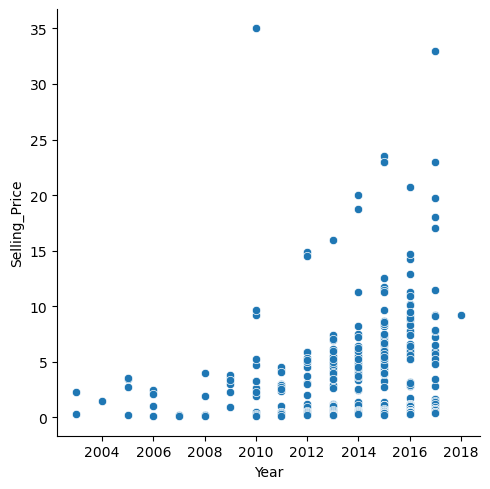

In [28]:
sns.relplot(x = df1.Year,y = df1.Selling_Price, data=df1)

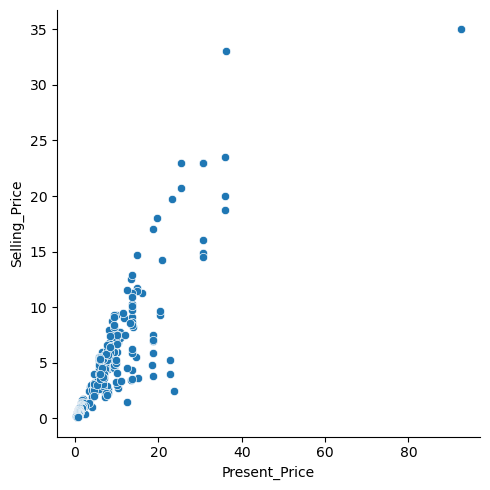

In [30]:
sns.relplot(x = df1.Present_Price, y = df1.Selling_Price, data = df1)

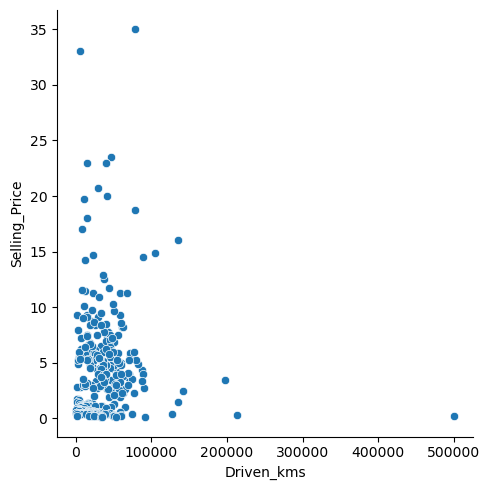

In [31]:
sns.relplot(x = df1.Driven_kms, y = df1.Selling_Price, data = df1)

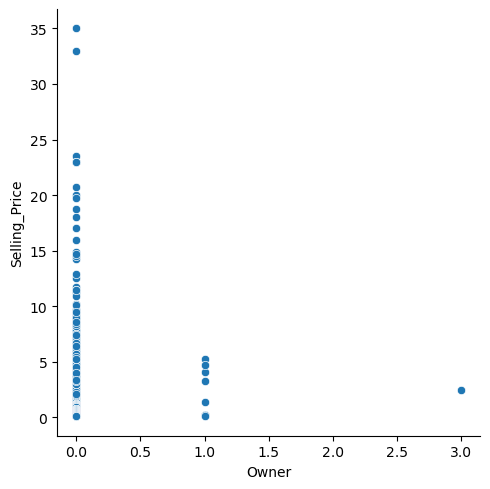

In [32]:
sns.relplot(x = df1.Owner, y = df1.Selling_Price, data = df1)

In [5]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

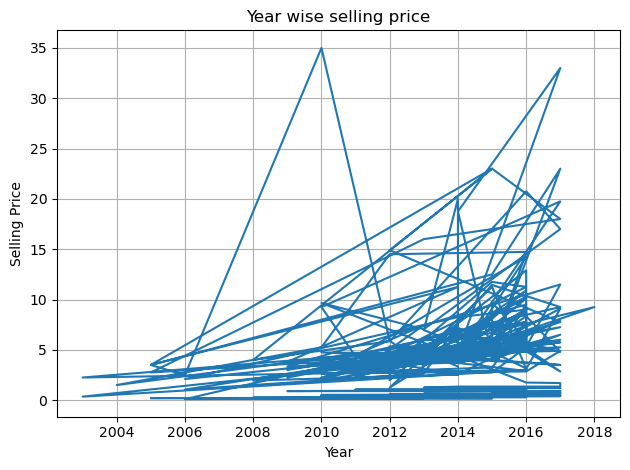

In [14]:
plt.plot(df1.Year, df1.Selling_Price, label = "Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year wise selling price")
plt.grid()
plt.tight_layout()
plt.show()

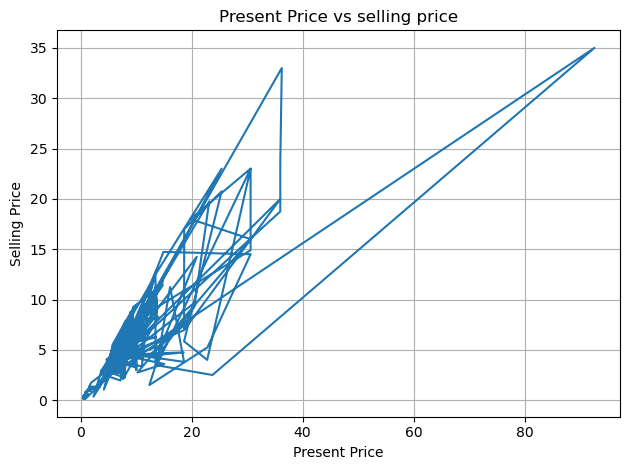

In [15]:
plt.plot(df1.Present_Price, df1.Selling_Price, label = "Year")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Present Price vs selling price")
plt.grid()
plt.tight_layout()
plt.show()

### Step 3 Multivariate Analysis

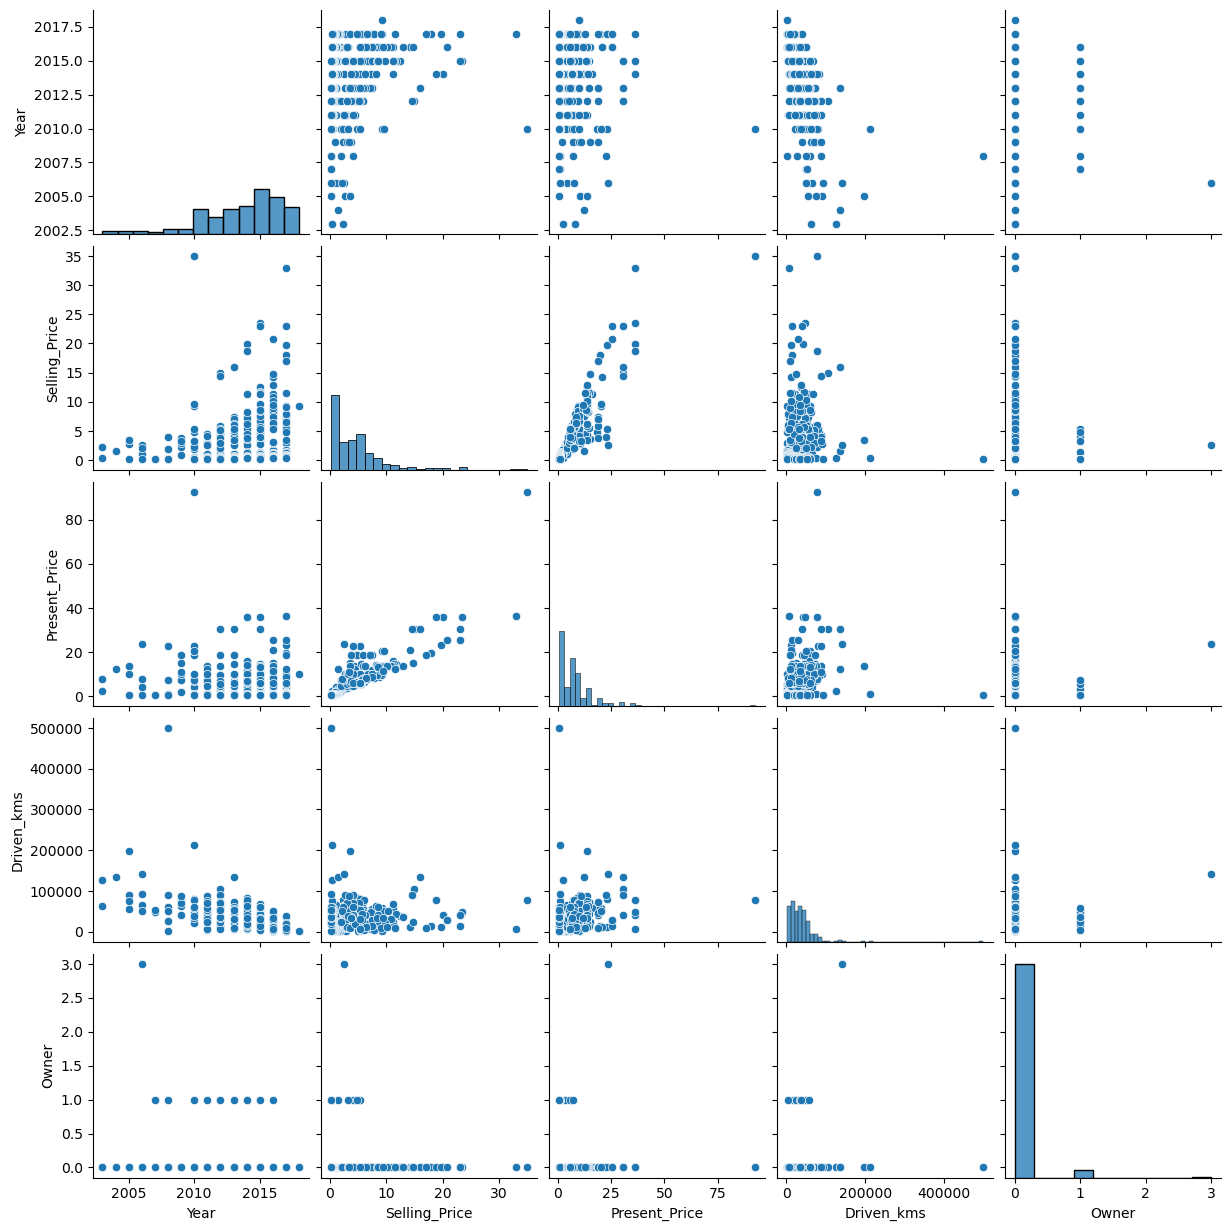

In [5]:
sns.pairplot(df1)

In [6]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

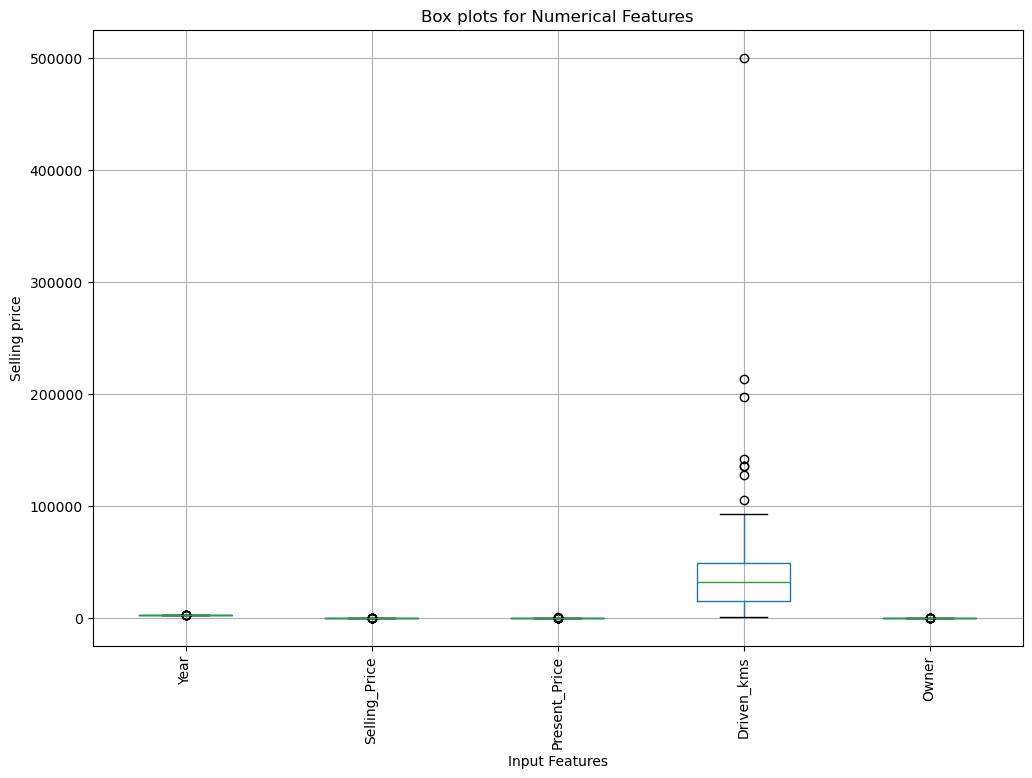

In [8]:
# creating box plot for all numerical features

numerical_columns = df1.select_dtypes(include=['int', 'float']).columns


plt.figure(figsize=(12, 8))
df1[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for Numerical Features')
plt.xlabel('Input Features')
plt.ylabel('Selling price')
plt.show()

<Axes: xlabel='Driven_kms'>

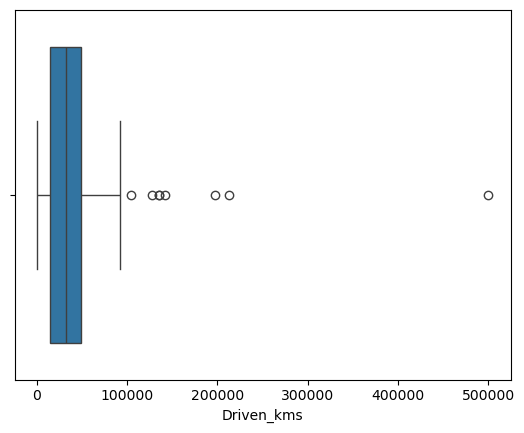

In [11]:
sns.boxplot(x = df1.Driven_kms)

In [14]:
# Removing Outliers
q1 = df1.Driven_kms.quantile(0.25)
q3 = df1.Driven_kms.quantile(0.75)

iqr = q3 - q1

ub = q3 + 1.5 * iqr
ub

99417.5

In [19]:
df1.loc[(df1['Driven_kms'] > ub), 'Driven_kms'] = 32000.0

In [20]:
np.median(df1.Driven_kms)

32000.0

In [21]:
df1.loc[(df1['Driven_kms'] > ub), 'Driven_kms']

Series([], Name: Driven_kms, dtype: int64)

In [22]:
# Outlier Removed.

In [23]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Data Presprocessing

### Encoding

In [39]:
df2 = df1[['Fuel_Type', 'Selling_type', 'Transmission',]]

In [40]:
df2

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [34]:
pd.unique(df1.Car_Name)

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [36]:
np.size(df1.Car_Name)

301

In [37]:
df1 = df1.drop('Car_Name', axis=1)

In [38]:
df1

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [72]:
# Checking categorical data
print(df1.Fuel_Type.value_counts())
print("------------------------------------")
print(df1.Selling_type.value_counts())
print("------------------------------------")
print(df1.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
------------------------------------
Selling_type
0    195
1    106
Name: count, dtype: int64
------------------------------------
Transmission
0    261
1     40
Name: count, dtype: int64


In [58]:
# Encoding Fuel_Type
df1.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding Selling_type
df1.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding Transmission
df1.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3040\3035514696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3040\3035514696.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3040\3035514696.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [59]:
df1

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [73]:
# Checking categorical data
print(df1.Fuel_Type.value_counts())
print("------------------------------------")
print(df1.Selling_type.value_counts())
print("------------------------------------")
print(df1.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
------------------------------------
Selling_type
0    195
1    106
Name: count, dtype: int64
------------------------------------
Transmission
0    261
1     40
Name: count, dtype: int64


In [74]:
print(pd.unique(df1.Transmission))
print(pd.unique(df1.Fuel_Type))
print(pd.unique(df1.Selling_type))

[0 1]
[0 1 2]
[0 1]


In [75]:
df1.head(1)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0


### Splittion Input and Output Columns

In [69]:
X = df1.drop(['Selling_Price'], axis = 1)
Y = df1['Selling_Price']

In [70]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [71]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=2)

In [88]:
# Loading Model
model = LinearRegression()

In [90]:
model.fit(X_train, Y_train)

LinearRegression()

In [93]:
train_prediction = model.predict(X_train)
train_prediction

array([ 3.79598339e+00,  5.90134851e+00,  8.11689779e+00, -2.12953619e+00,
        6.63599566e+00,  8.54925419e+00,  6.15868350e+00,  6.31672282e+00,
        5.61223911e+00,  1.65672083e+01,  2.32215754e+00,  1.17545059e+00,
       -4.02322685e-01,  5.66898674e+00,  7.09699381e+00,  4.74328678e-01,
        6.76313087e+00,  1.45971725e+01,  2.68398657e+00,  7.66114527e+00,
       -6.76350616e-01,  8.97766274e+00,  1.17394151e+00,  2.41208319e+00,
       -1.95059269e+00,  9.05339344e-01,  9.03141406e+00, -2.56486341e-01,
       -2.64227408e+00,  9.66833004e+00,  7.09254408e+00,  9.91376280e-01,
        4.90366846e+00,  4.35594955e-01,  4.86546567e+00,  2.49600458e+00,
        1.49735743e+00,  2.50435154e-01,  1.83910292e+00,  1.02399579e+00,
        4.38424620e+00,  6.51093519e+00, -8.84373390e-02, -1.46658624e-01,
        6.03357052e+00,  3.32319010e+00,  2.55639423e+00,  7.57071001e+00,
        4.80700140e+00,  4.44529352e+00,  6.40179645e+00,  2.22906293e+00,
        4.89467744e+00,  

In [95]:
# comparing output
train_error_score = metrics.r2_score(Y_train, train_prediction)
train_error_score

0.8865963658968565

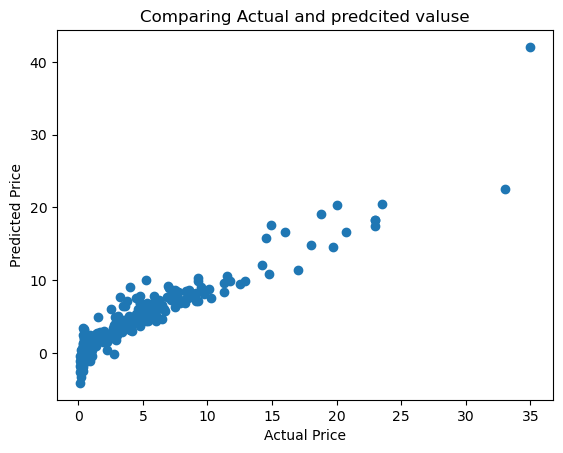

In [96]:
# Vizualizing The actual price and predicted prize
plt.scatter(Y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparing Actual and predcited valuse")
plt.show()

In [97]:
# By visuaizing we can say actual price and predicted price are close to each other thus, the model
# trained well

In [99]:
test_prediction = model.predict(X_test)
test_prediction

array([10.58765637,  0.69320162,  4.14441687,  4.69952852, 10.1369199 ,
        4.65035742,  7.12813699,  7.42548181,  0.2725317 ,  5.34013454,
        6.59553034,  5.988415  ,  1.88691624,  8.01455395,  1.58516466,
        2.11299736,  2.06788711,  1.78371922,  8.56552123,  4.03748051,
        1.90794086,  8.5793933 ,  1.49996345,  9.36008542,  1.19418657,
        7.85184809,  1.42591347, -3.52458232,  4.62210824,  3.10593955,
        3.33272524])

In [100]:
test_error_score = metrics.r2_score(Y_test, test_prediction)
test_error_score

0.8215861392092991

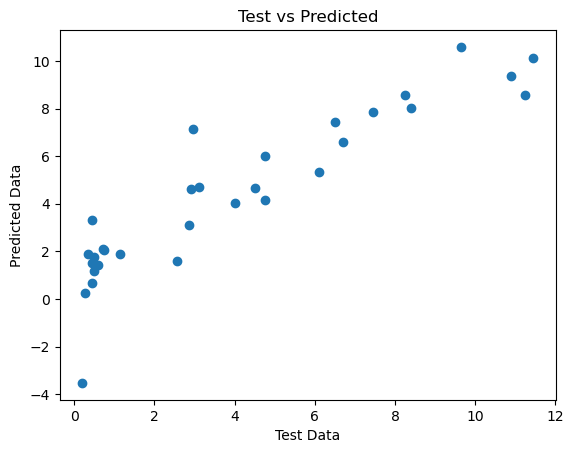

In [101]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.title("Test vs Predicted")
plt.show()

In [102]:
# so, data had predicted well according to number of data rows.

In [103]:
# Lets see in lasso regression model

In [104]:
# Loading Model
model_lasso = Lasso()

In [105]:
model_lasso.fit(X_train, Y_train)

Lasso()

In [106]:
lasso_train_prediction = model_lasso.predict(X_train)
lasso_train_prediction

array([ 3.51072673,  5.73942207,  8.4607569 , -0.99049435,  5.00628837,
        6.61956111,  5.90011982,  6.43686161,  4.1689852 , 16.503963  ,
        2.86420412,  1.8311706 ,  0.5242048 ,  4.21687395,  7.023578  ,
        1.31843421,  5.1049475 , 14.30413983,  2.52658155,  6.05818665,
        0.2512894 ,  9.91549998,  1.87876061,  2.94791972, -0.72308024,
        1.59612397,  9.53492766,  0.61996167, -1.46728652,  8.56732444,
        7.02012493,  2.99477728,  4.31146839,  1.20684494,  4.31432781,
        2.29014797,  2.24293236,  1.14257881,  2.43430478,  1.76588306,
        4.33710635,  4.35059696,  0.9026156 ,  2.06068684,  4.14105506,
        2.64410527,  3.15046389,  6.25738298,  5.03225265,  4.30542771,
        5.18877914,  2.20558571,  4.61932811,  2.05708186,  0.71224975,
        3.63564163,  1.38557496,  5.02978618,  2.0209493 ,  6.12433236,
        7.71357886,  5.32204694,  2.98027688, 21.25938844,  1.98255361,
        5.6107707 ,  2.82886531,  3.67742646, 10.84766704,  8.79

In [107]:
# comparing output
lasso_train_error_score = metrics.r2_score(Y_train, lasso_train_prediction)
lasso_train_error_score

0.844224250947966

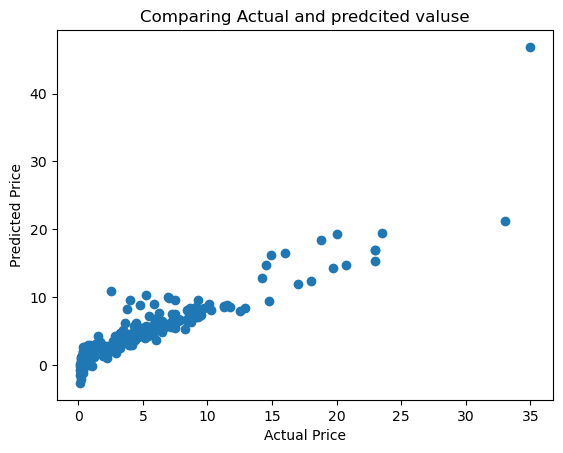

In [108]:
# Vizualizing The actual price and predicted prize
plt.scatter(Y_train, lasso_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparing Actual and predcited valuse")
plt.show()

In [97]:
# By visuaizing after lasso regression model we can say actual price and predicted price are more closer than 
# linear regression to each other. Thus, the lasso model trained better than regression model

In [110]:
lasso_test_prediction = model_lasso.predict(X_test)
lasso_test_prediction

array([ 9.86861624,  1.46389269,  4.14402875,  2.86512411,  9.30133908,
        4.4739546 ,  3.52526855,  5.567068  ,  1.032599  ,  5.28021612,
        6.6532211 ,  4.11994533,  1.4027224 ,  8.38133629,  1.62369182,
        2.67297364,  2.66688584,  2.38541526,  7.32075056,  3.93671371,
        2.68065841,  7.35832394,  2.12584851,  8.5341177 ,  1.86206965,
        6.20617535,  2.11366258, -1.27983326,  4.19466427,  2.7550785 ,
        2.65150471])

In [111]:
lasso_test_error_score = metrics.r2_score(Y_test, lasso_test_prediction)
lasso_test_error_score

0.844414014631402

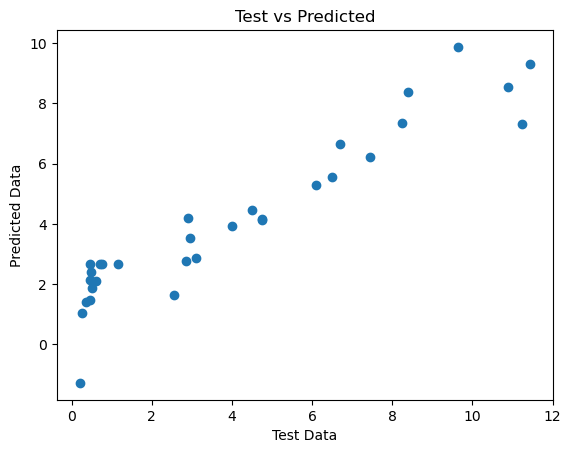

In [112]:
plt.scatter(Y_test, lasso_test_prediction)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.title("Test vs Predicted")
plt.show()

In [ ]:
# thus the model performed better than linear regression.